<a href="https://colab.research.google.com/github/mzucali/pyStereoRose/blob/main/RoseDiagram_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

python IMPORT STATEMENTs

RUN the box

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

Function definition

RUN it

In [3]:


# Function to load and separate data based on the 'type' column
def load_and_separate_data(file_path, direction_column, weight_column, type_column, use_weight):
    df = pd.read_excel(file_path)
    separated_data = {'axes': ([], []), 'directions': ([], [])}

    for _, row in df.iterrows():
        data_type = row[type_column].strip().lower()
        if data_type not in ['axes', 'directions']:
            continue  # Skip invalid entries

        direction = row[direction_column]
        if pd.isna(direction):
            continue  # Skip missing values

        weight = row[weight_column] if use_weight == 'yes' and not pd.isna(row[weight_column]) else 1

        if data_type == 'directions':
            # Convert axes to bi-directional (0-180° mirrored to 180-360°)
            direction1 = direction % 180  # Normalize to [0,180)
            direction2 = (direction1 + 180) % 360  # Mirror at 180°
            separated_data[data_type][0].extend([direction1, direction2])
            separated_data[data_type][1].extend([weight, weight])
        else:
            separated_data[data_type][0].append(direction % 360)  # Ensure within 0-360
            separated_data[data_type][1].append(weight)

    return separated_data


**SET** VARIABLES


1.   upload your .xlsx file
2.   set the headers here (e.g., **DIR** for azimuthal values, **LEN** for weight factor, **mode** for data type)
3. data type must be **directions** (bi-directional data) or **axes** (mono-directional data)
4. example file is here: https://www.dropbox.com/scl/fi/odpv1fg18er3ujys99u0y/Rose_input_test.xlsx?rlkey=4un4kbk01d4ais4t8cos69sc8&dl=0
5. change file_path = '' variable with your actual file name


then **RUN**





In [4]:
# Ask the user for input
#file_path = input("Enter the file path: ")
file_path = '/content/Rose_input_test.xlsx'
#sheet_name = input("Enter the sheet name: ")
#direction_column = input("Enter the direction column name: ")
direction_column = 'DIR'

#weight_column = input("Enter the weight column name: ")
weight_column = 'LEN'

#type_column = input("Enter the type column name: ")
type_column = 'mode'

#use_weight = input("Do you want to use the weight column? (yes/no): ").strip().lower()
use_weight = 'no'

# Load and separate data
separated_data = load_and_separate_data(file_path, direction_column, weight_column, type_column, use_weight)


check data with this output for **axes** type data

In [ ]:
print(separated_data['axes'])

check data with this output for **direction** type data

In [ ]:
print(separated_data['directions'])

RUN this code to get plot and save it as raster (png) and vector files (eps, pdf, svg)

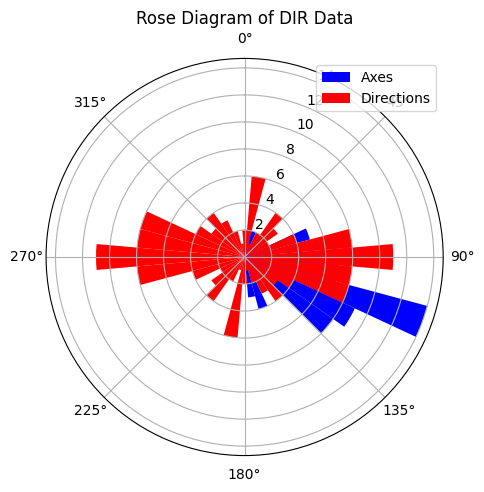

In [7]:
# Initialize figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.tight_layout()
colors = {'axes': 'blue', 'directions': 'red'}
labels = {
    'axes': f"Axes (N={len(separated_data['axes'][0])})",
    'directions': f"Directions (N={len(separated_data['directions'][0])})"
}

# Process and plot each type
theta_range = (0, 2 * np.pi)
num_bins = 36
for data_type, (direction_data, weights) in separated_data.items():
    if direction_data:
        direction_data_radians = np.radians(direction_data)
        counts, bin_edges = np.histogram(direction_data_radians, bins=num_bins, range=theta_range, weights=weights)
        ax.bar(bin_edges[:-1], counts, width=(2*np.pi/num_bins), bottom=0.0, color=colors[data_type], alpha=1, label=labels[data_type])

# Set plot properties
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetamin(0)
ax.set_thetamax(360)
ax.set_title(f"Rose Diagram of {direction_column} Data", pad=25)
if any(len(direction_data) > 0 for direction_data, _ in separated_data.values()):
    ax.legend()

# Show and save the plot
plt.show()
output_filename = "categorized_rose_diagram.png"
fig.savefig(output_filename)

# Save the plot in different vector formats
output_filename_svg = "categorized_rose_diagram.svg"
output_filename_pdf = "categorized_rose_diagram.pdf"
output_filename_eps = "categorized_rose_diagram.eps"

fig.savefig(output_filename_svg, format="svg")
fig.savefig(output_filename_pdf, format="pdf")
fig.savefig(output_filename_eps, format="eps")

plt.close("all")